In [ ]:
import pandas as pd
import numpy as np

# Load the dataset, specifying the error_bad_lines parameter to skip problematic lines
bitcoin_price = pd.read_csv('btcusd_1-min_data.csv', on_bad_lines='skip')
print(bitcoin_price.head())

      Timestamp  Open  High   Low  Close  Volume                   datetime
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:01:00+00:00
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:02:00+00:00
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:03:00+00:00
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:04:00+00:00
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:05:00+00:00


In [ ]:
# Check for missing values
print(bitcoin_price.isnull().sum())

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
datetime     160800
dtype: int64


In [ ]:
# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", bitcoin_price.shape)

# Get summary statistics of the dataset
print(bitcoin_price.describe())

# Get information about the dataset (data types, non-null counts, etc.)
print(bitcoin_price.info())

Shape of the dataset: (6958771, 7)
          Timestamp          Open          High           Low         Close  \
count  6.958771e+06  6.958771e+06  6.958771e+06  6.958771e+06  6.958771e+06   
mean   1.533302e+09  1.669675e+04  1.670355e+04  1.668974e+04  1.669676e+04   
std    1.204192e+08  2.318039e+04  2.318840e+04  2.317221e+04  2.318040e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.428852e+09  4.192100e+02  4.193800e+02  4.190200e+02  4.192050e+02   
50%    1.533234e+09  6.472360e+03  6.475010e+03  6.469240e+03  6.472280e+03   
75%    1.637615e+09  2.666200e+04  2.666900e+04  2.665500e+04  2.666200e+04   
max    1.741997e+09  1.091110e+05  1.093560e+05  1.087940e+05  1.090360e+05   

             Volume  
count  6.958771e+06  
mean   5.337120e+00  
std    2.261568e+01  
min    0.000000e+00  
25%    1.760996e-02  
50%    4.741001e-01  
75%    3.061378e+00  
max    5.853852e+03  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69587

In [ ]:
bitcoin_price['datetime'] = pd.to_datetime(bitcoin_price['datetime'])
bitcoin_price.set_index('datetime', inplace=True)
bitcoin_price.duplicated().sum()
bitcoin_price.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

<ipython-input-9-9008bd836bb0>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bitcoin_price.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})


,Open,High,Low,Close,Volume
datetime,,,,,
2012-01-01 10:00:00+00:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 11:00:00+00:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 12:00:00+00:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 13:00:00+00:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 14:00:00+00:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...
2025-03-14 20:00:00+00:00,84564.00,84564.00,83722.00,84137.00,79.401340
2025-03-14 21:00:00+00:00,84143.00,84324.00,83989.00,84205.00,57.861877
2025-03-14 22:00:00+00:00,84218.00,84517.00,84123.00,84449.00,6.936443


<ipython-input-10-2fd8e35e8b74>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = bitcoin_price.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})


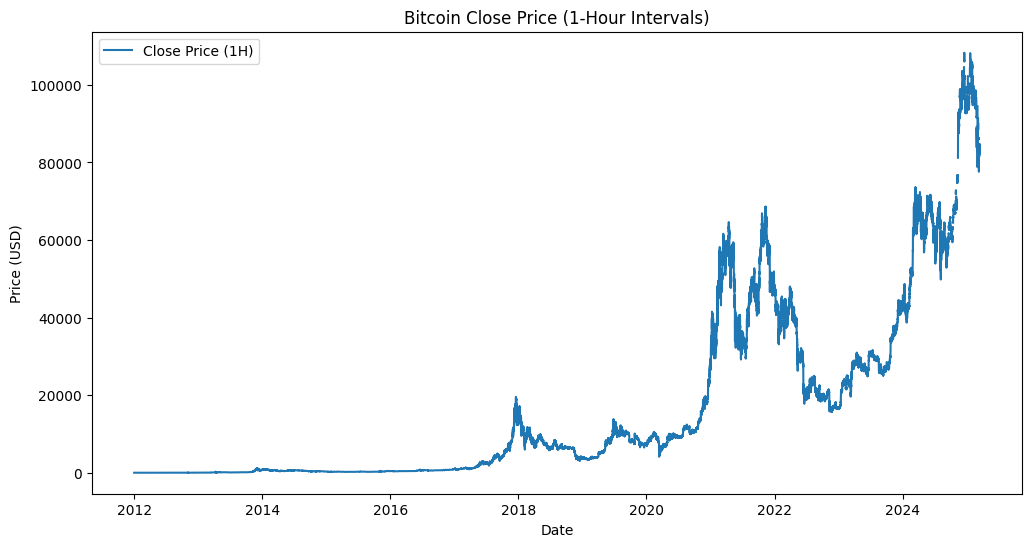

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for resampling

# Assuming bitcoin_price is your DataFrame and it has a datetime index
resampled_data = bitcoin_price.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data['Close'], label='Close Price (1H)')
plt.title('Bitcoin Close Price (1-Hour Intervals)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<ipython-input-11-02d1a7afce82>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = bitcoin_price.resample('1H').agg({


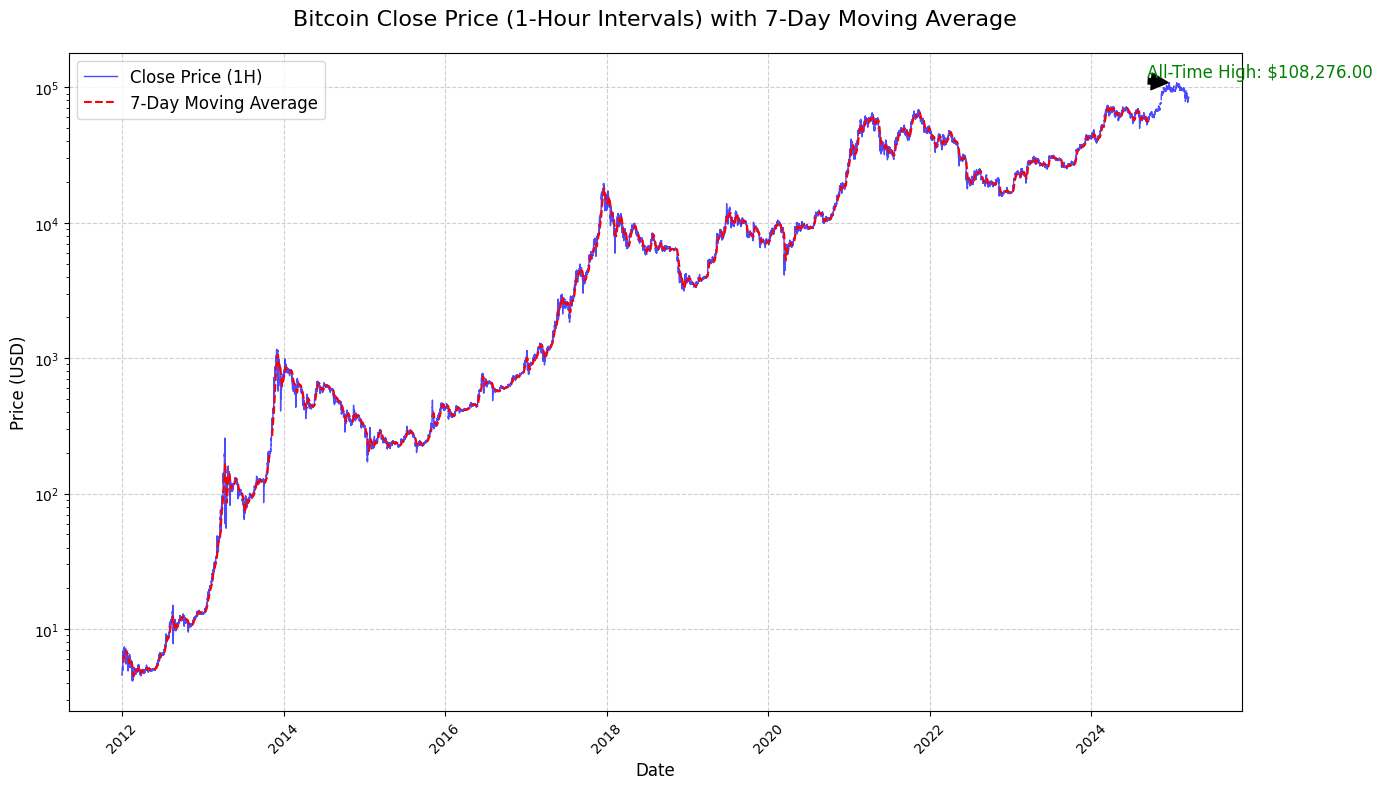

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Resample the data to 1-hour intervals
resampled_data = bitcoin_price.resample('1H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Calculate a 7-day moving average for the Close price
resampled_data['MA_7'] = resampled_data['Close'].rolling(window=7*24).mean()

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the Close price
plt.plot(resampled_data.index, resampled_data['Close'],
         color='blue', alpha=0.7, linewidth=1, label='Close Price (1H)')

# Plot the 7-day moving average
plt.plot(resampled_data.index, resampled_data['MA_7'],
         color='red', linestyle='--', linewidth=1.5, label='7-Day Moving Average')

# Add title and labels
plt.title('Bitcoin Close Price (1-Hour Intervals) with 7-Day Moving Average', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Add annotations for significant events (example: all-time high)
all_time_high = resampled_data['Close'].max()
all_time_high_date = resampled_data['Close'].idxmax()
plt.annotate(f'All-Time High: ${all_time_high:,.2f}',
             xy=(all_time_high_date, all_time_high),
             xytext=(all_time_high_date - pd.Timedelta(days=100), all_time_high * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='green')

# Use a logarithmic scale for the y-axis if the price range is wide
plt.yscale('log')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Resample to daily data
bitcoin_price_daily = bitcoin_price.resample('D').mean()

# Find the maximum and minimum closing prices
max_close = bitcoin_price_daily['Close'].max()
min_close = bitcoin_price_daily['Close'].min()

# Find the dates corresponding to the maximum and minimum closing prices
max_close_date = bitcoin_price_daily['Close'].idxmax()
min_close_date = bitcoin_price_daily['Close'].idxmin()

# Display the results
print(f"Maximum Closing Price: ${max_close:.2f} on {max_close_date}")
print(f"Minimum Closing Price: ${min_close:.2f} on {min_close_date}")

Maximum Closing Price: $106868.43 on 2024-12-17 00:00:00+00:00
Minimum Closing Price: $4.32 on 2012-02-19 00:00:00+00:00


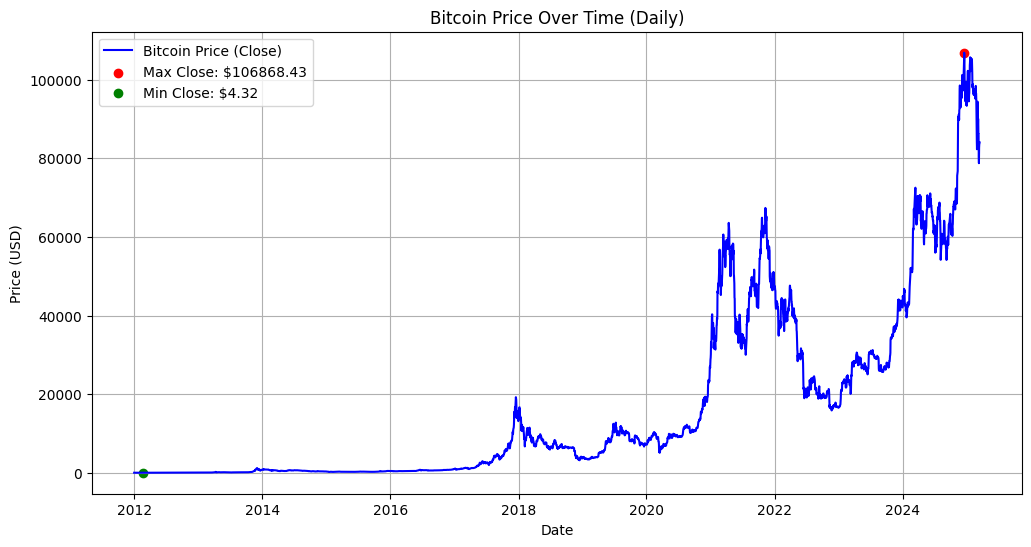

In [ ]:
import matplotlib.pyplot as plt

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_price_daily.index, bitcoin_price_daily['Close'], label='Bitcoin Price (Close)', color='blue')

# Highlight the maximum and minimum points
plt.scatter(max_close_date, max_close, color='red', label=f'Max Close: ${max_close:.2f}')
plt.scatter(min_close_date, min_close, color='green', label=f'Min Close: ${min_close:.2f}')

# Add title, labels, and legend
plt.title('Bitcoin Price Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


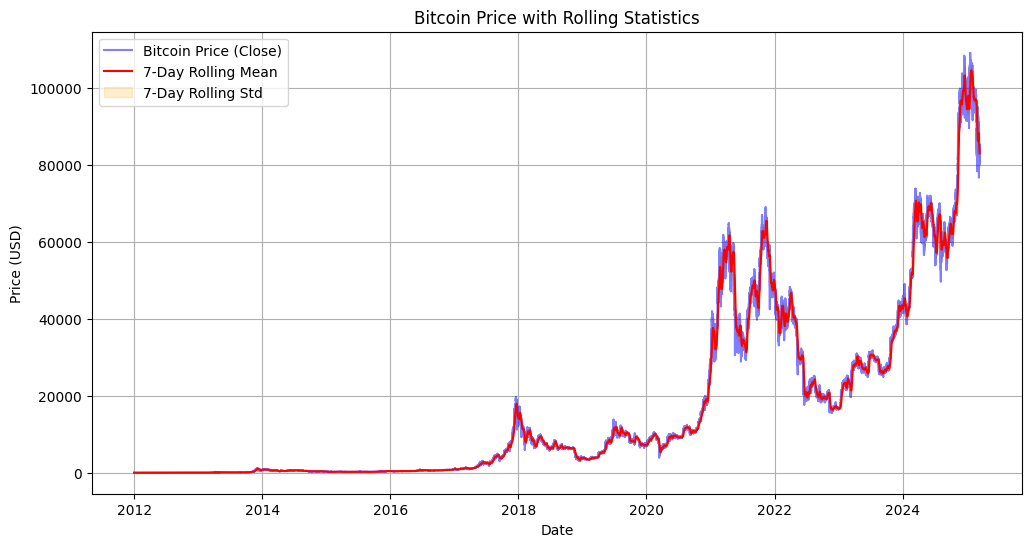

Date of Maximum Close Price: 2025-01-20 06:55:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' to datetime (if not already done)
bitcoin_price['datetime'] = pd.to_datetime(bitcoin_price['Timestamp'], unit='s')

# Set 'datetime' as the index for easier time-based operations
bitcoin_price.set_index('datetime', inplace=True)

# Sort the index to ensure it's monotonic increasing
bitcoin_price.sort_index(inplace=True)

# Calculate 7-day rolling mean and standard deviation
rolling_mean = bitcoin_price['Close'].rolling(window='7D').mean()  # Use '7D' for 7 days
rolling_std = bitcoin_price['Close'].rolling(window='7D').std()

# Plot Bitcoin price with rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_price.index, bitcoin_price['Close'], label='Bitcoin Price (Close)', color='blue', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean, label='7-Day Rolling Mean', color='red')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='orange', alpha=0.2, label='7-Day Rolling Std')
plt.title('Bitcoin Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Find and print the date of the maximum Close price
max_close_date = bitcoin_price['Close'].idxmax()
print(f"Date of Maximum Close Price: {max_close_date}")

<ipython-input-17-477fc1752a02>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bitcoin_price['Close'], shade=True, color='blue')


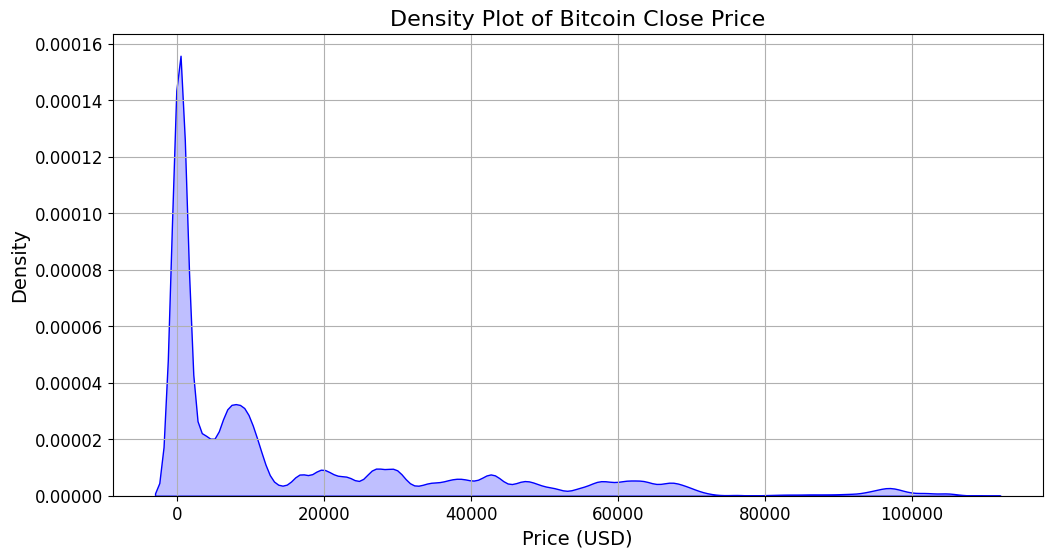

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.kdeplot(bitcoin_price['Close'], shade=True, color='blue')
plt.title('Density Plot of Bitcoin Close Price', fontsize=16)
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid()

# Adjust y-axis limits if necessary
# plt.ylim(0, 0.0005)  # Example: Set y-axis limits

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.5f'))  # Adjust the format as needed

# Increase font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
correlation_matrix = bitcoin_price[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  1.000000  1.000000  0.999999 -0.086601
High    1.000000  1.000000  0.999999  1.000000 -0.086528
Low     1.000000  0.999999  1.000000  1.000000 -0.086689
Close   0.999999  1.000000  1.000000  1.000000 -0.086608
Volume -0.086601 -0.086528 -0.086689 -0.086608  1.000000


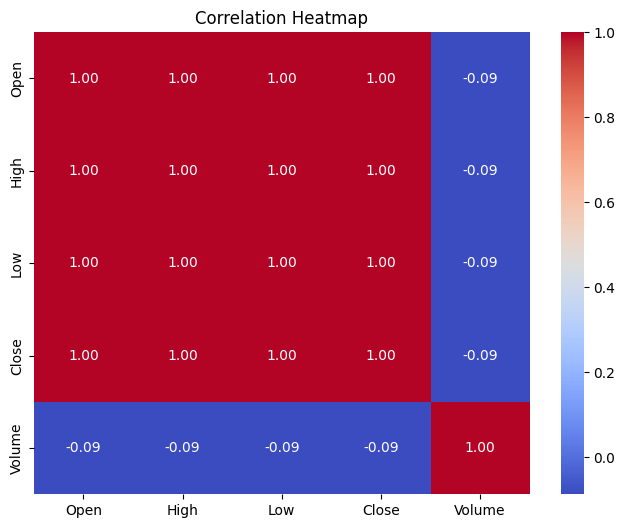

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

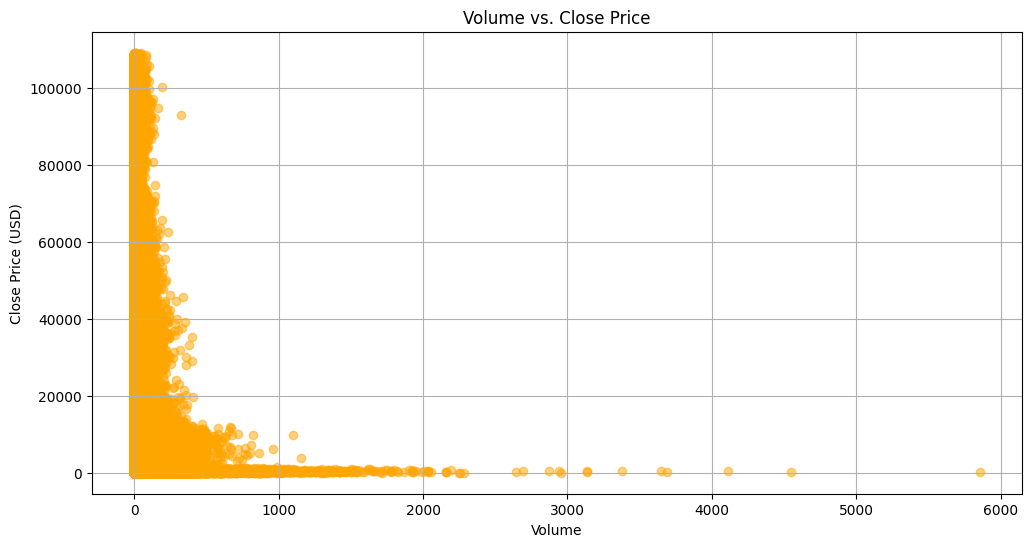

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(bitcoin_price['Volume'], bitcoin_price['Close'], alpha=0.5, color='orange')
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.grid()
plt.show()

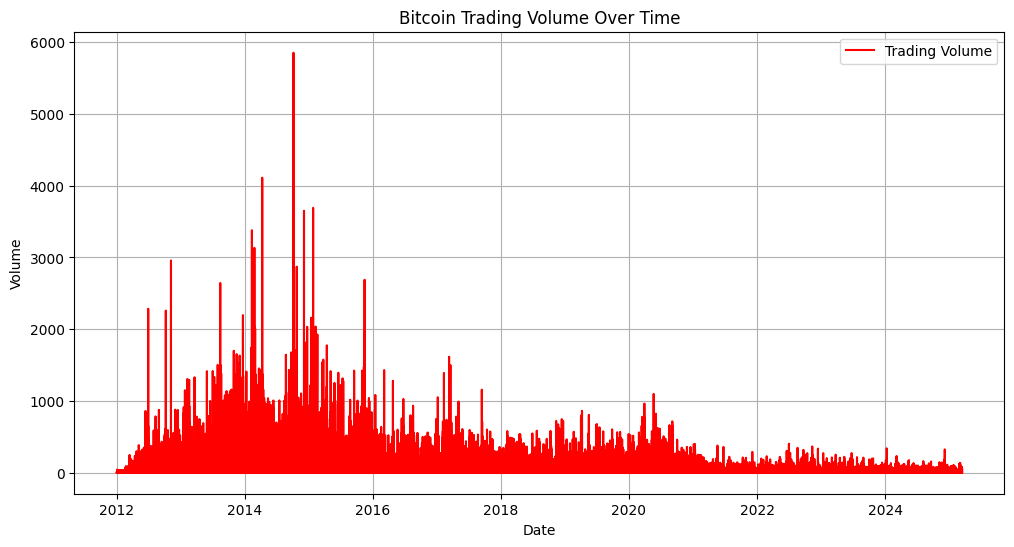

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_price.index, bitcoin_price['Volume'], label='Trading Volume', color='red')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Find the top 10 days with the highest trading volume
top_10_days = bitcoin_price.nlargest(10, 'Volume')

# Display the top 10 days using 'Timestamp' instead of 'Date' or 'datetime'
# 'Timestamp' is the actual column name in your DataFrame
print(top_10_days[['Timestamp', 'Volume']])

                        Timestamp       Volume
datetime                                      
2014-10-05 19:46:00  1.412538e+09  5853.852166
2014-10-06 11:07:00  1.412594e+09  4545.893846
2014-04-10 11:05:00  1.397128e+09  4111.876106
2015-01-25 19:50:00  1.422215e+09  3691.012103
2014-12-04 16:57:00  1.417712e+09  3650.668510
2014-02-10 16:01:00  1.392048e+09  3379.750829
2014-02-24 18:37:00  1.393267e+09  3134.588484
2014-10-06 10:59:00  1.412593e+09  3133.606360
2012-11-06 02:58:00  1.352171e+09  2958.477574
2014-04-10 19:13:00  1.397157e+09  2939.356194


<ipython-input-24-5a36f0a399cd>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = bitcoin_price.pivot_table(index='month', columns='year', values='Close', aggfunc='mean')


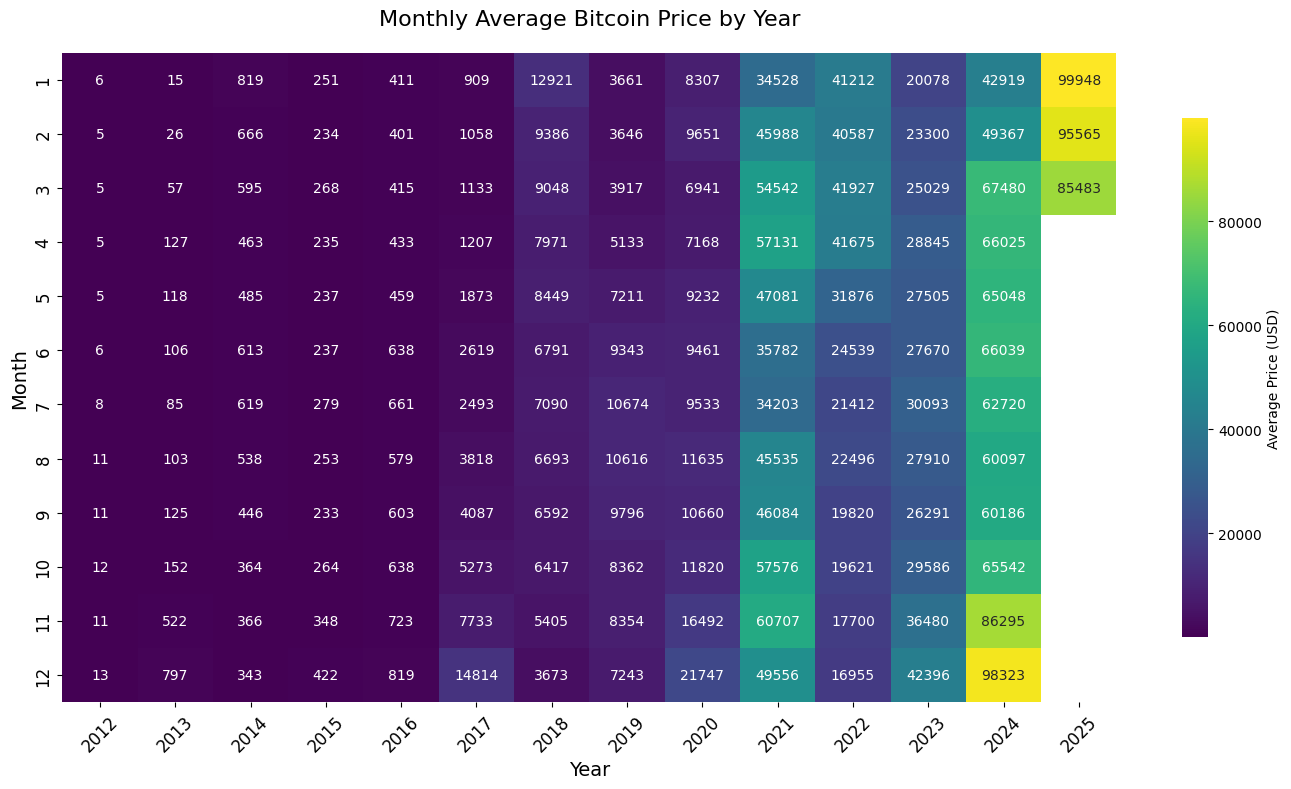

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract year and month
bitcoin_price['year'] = bitcoin_price.index.year
bitcoin_price['month'] = bitcoin_price.index.month

# Ensure months are ordered correctly
bitcoin_price['month'] = pd.Categorical(bitcoin_price['month'],
                                        categories=range(1, 13),
                                        ordered=True)

# Pivot table for heatmap
heatmap_data = bitcoin_price.pivot_table(index='month', columns='year', values='Close', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='viridis',  # Use a more visually appealing color map
    annot=True,
    fmt='.0f',       # Format annotations as integers (no decimal places)
    annot_kws={'size': 10},  # Adjust annotation font size
    cbar_kws={'label': 'Average Price (USD)', 'shrink': 0.8}  # Add a clear color bar label
)

# Improve layout
plt.title('Monthly Average Bitcoin Price by Year', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<ipython-input-25-842c3289c2f4>:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = bitcoin_price.pivot_table(index='day', columns='month', values='Close', aggfunc='mean')


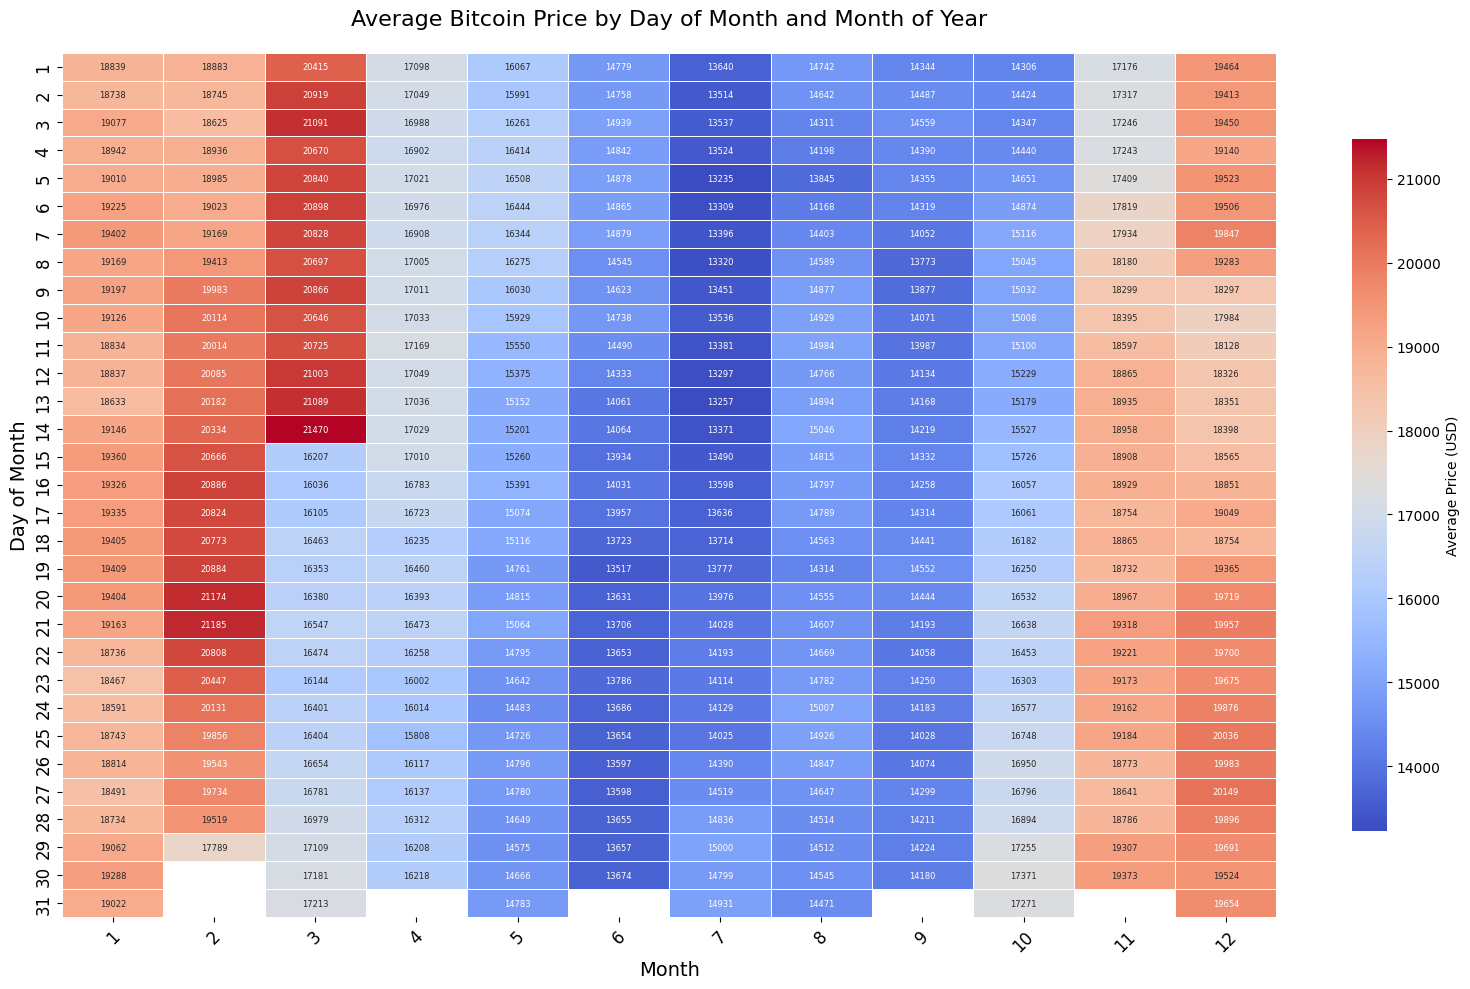

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is a DatetimeIndex (if not already)
bitcoin_price.index = pd.to_datetime(bitcoin_price.index)

# Extract year, month, and day
bitcoin_price['year'] = bitcoin_price.index.year
bitcoin_price['month'] = bitcoin_price.index.month
bitcoin_price['day'] = bitcoin_price.index.day

# Ensure months and days are ordered correctly
bitcoin_price['month'] = pd.Categorical(bitcoin_price['month'],
                                        categories=range(1, 13),
                                        ordered=True)
bitcoin_price['day'] = pd.Categorical(bitcoin_price['day'],
                                      categories=range(1, 32),
                                      ordered=True)

# Pivot table for heatmap (average Close price by month and day)
heatmap_data = bitcoin_price.pivot_table(index='day', columns='month', values='Close', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(16, 10))  # Increase figure size
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',  # Use a different colormap
    annot=True,       # Add annotations (average prices)
    fmt='.0f',        # Format annotations as integers (no decimal places)
    annot_kws={'size': 6},  # Reduce annotation font size
    cbar_kws={'label': 'Average Price (USD)', 'shrink': 0.8},  # Add a clear color bar label
    mask=heatmap_data.isnull(),  # Mask missing values
    linewidths=0.5  # Add lines between cells
)

# Improve layout
plt.title('Average Bitcoin Price by Day of Month and Month of Year', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Day of Month', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Adjust x-axis label font size and rotate labels
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<ipython-input-26-6fa1c8484a4a>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = bitcoin_price.pivot_table(index='hour', columns='day_of_week', values='Close', aggfunc='mean')


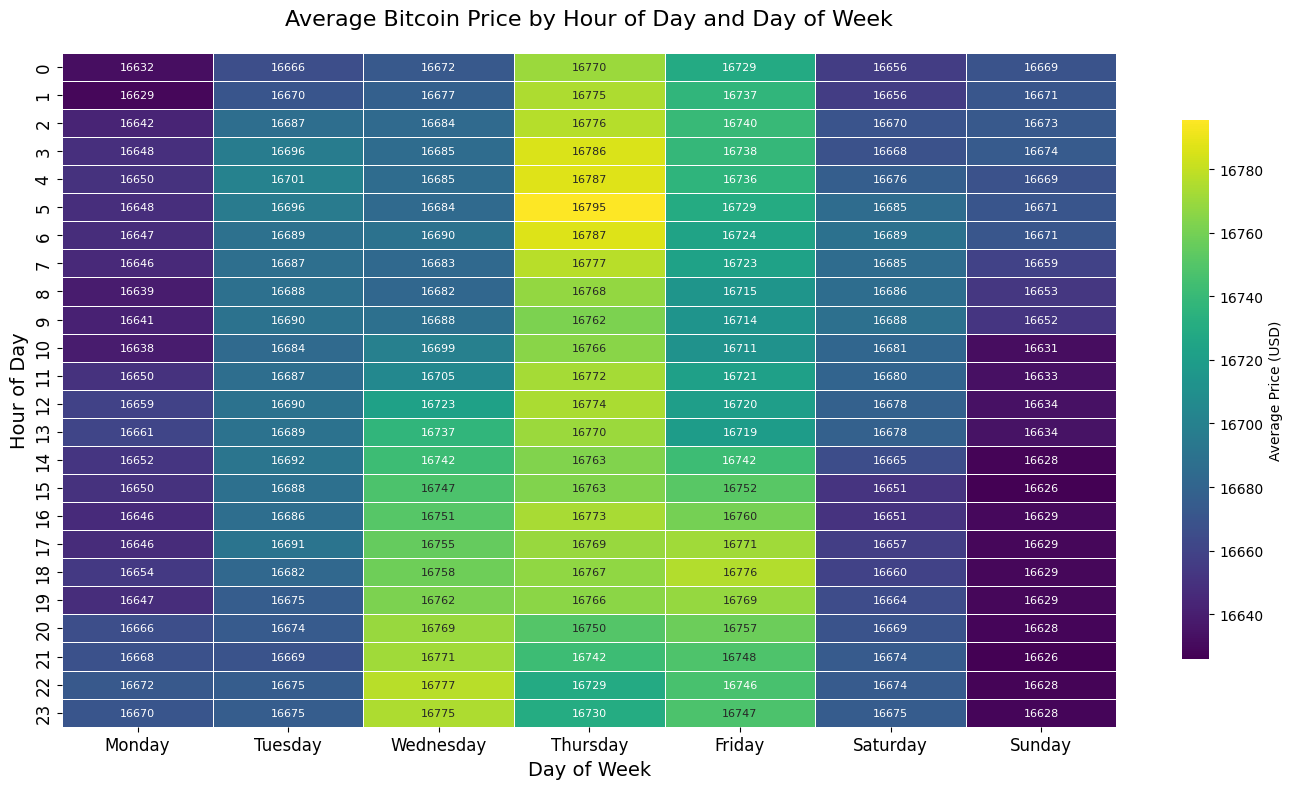

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is a DatetimeIndex (if not already)
bitcoin_price.index = pd.to_datetime(bitcoin_price.index)

# Extract day of the week and hour
bitcoin_price['day_of_week'] = bitcoin_price.index.day_name()  # Full day name (e.g., Monday)
bitcoin_price['hour'] = bitcoin_price.index.hour  # Hour of the day (0-23)

# Ensure days of the week are ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bitcoin_price['day_of_week'] = pd.Categorical(bitcoin_price['day_of_week'],
                                             categories=days_order,
                                             ordered=True)

# Pivot table for heatmap (average Close price by day of week and hour)
heatmap_data = bitcoin_price.pivot_table(index='hour', columns='day_of_week', values='Close', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='viridis',  # Use a visually appealing color map
    annot=True,      # Add annotations (average prices)
    fmt='.0f',       # Format annotations as integers (no decimal places)
    annot_kws={'size': 8},  # Adjust annotation font size
    cbar_kws={'label': 'Average Price (USD)', 'shrink': 0.8},  # Add a clear color bar label
    linewidths=0.5,  # Add lines between cells for better readability
)

# Improve layout
plt.title('Average Bitcoin Price by Hour of Day and Day of Week', fontsize=16, pad=20)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis label font size
plt.yticks(fontsize=12)  # Adjust y-axis label font size
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

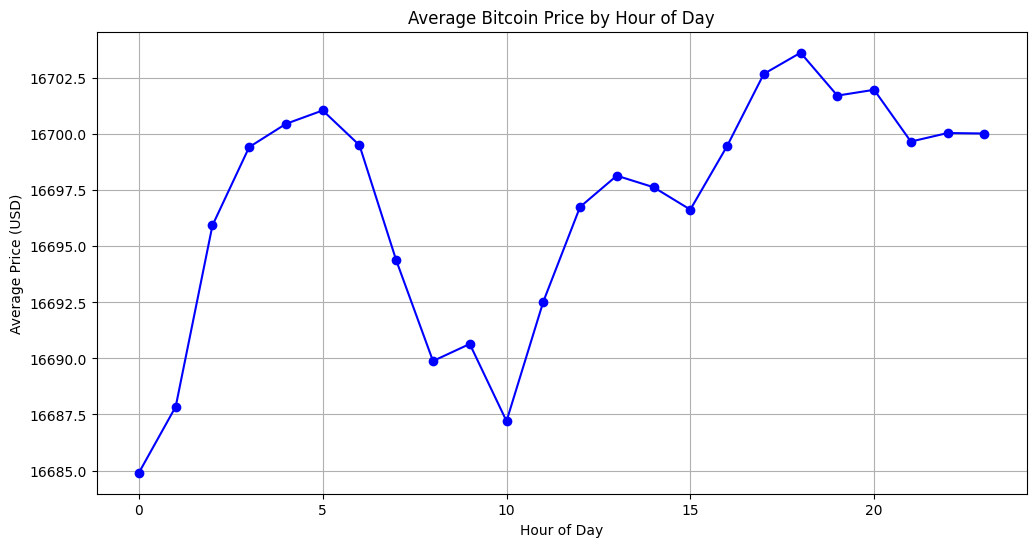

In [ ]:
bitcoin_price['hour'] = bitcoin_price.index.hour
hourly_avg = bitcoin_price.groupby('hour')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', color='blue')
plt.title('Average Bitcoin Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price (USD)')
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Resample to daily data for candlestick chart
daily_data = bitcoin_price.resample('1D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

fig = go.Figure(data=[go.Candlestick(
    x=daily_data.index,
    open=daily_data['Open'],
    high=daily_data['High'],
    low=daily_data['Low'],
    close=daily_data['Close']
)])

fig.update_layout(
    title='Bitcoin Daily Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_dark'
)
fig.show()

In [ ]:
# Ensure the index is a datetime object
bitcoin_price.index = pd.to_datetime(bitcoin_price.index)

# Define the time periods
first_period = ('2021-02-05 10:52:04', '2021-06-23 19:29:37')
second_period = ('2022-04-07 13:00:00', '2022-08-30 12:31:00')
third_period = ('2023-02-25 20:49:09', '2023-03-05 23:59:56')

# Filter the dataset for each period
first_period_data = bitcoin_price.loc[first_period[0]:first_period[1]]
second_period_data = bitcoin_price.loc[second_period[0]:second_period[1]]
third_period_data = bitcoin_price.loc[third_period[0]:third_period[1]]

# Display the first few rows of each period
print("First Period Data:")
print(first_period_data.head())

print("\nSecond Period Data:")
print(second_period_data.head())

print("\nThird Period Data:")
print(third_period_data.head())

First Period Data:
                        Timestamp      Open      High       Low     Close  \
datetime                                                                    
2021-02-05 10:53:00  1.612522e+09  37293.28  37295.88  37275.46  37295.88   
2021-02-05 10:54:00  1.612522e+09  37268.83  37271.56  37245.52  37252.64   
2021-02-05 10:55:00  1.612522e+09  37260.13  37282.37  37247.46  37271.04   
2021-02-05 10:56:00  1.612523e+09  37271.11  37271.25  37232.06  37259.48   
2021-02-05 10:57:00  1.612523e+09  37234.86  37234.96  37166.93  37169.40   

                       Volume  year month day day_of_week  hour  Daily_Return  \
datetime                                                                        
2021-02-05 10:53:00  2.707914  2021     2   5      Friday    10      0.000332   
2021-02-05 10:54:00  7.999682  2021     2   5      Friday    10     -0.001159   
2021-02-05 10:55:00  1.630951  2021     2   5      Friday    10      0.000494   
2021-02-05 10:56:00  1.359159  2021 

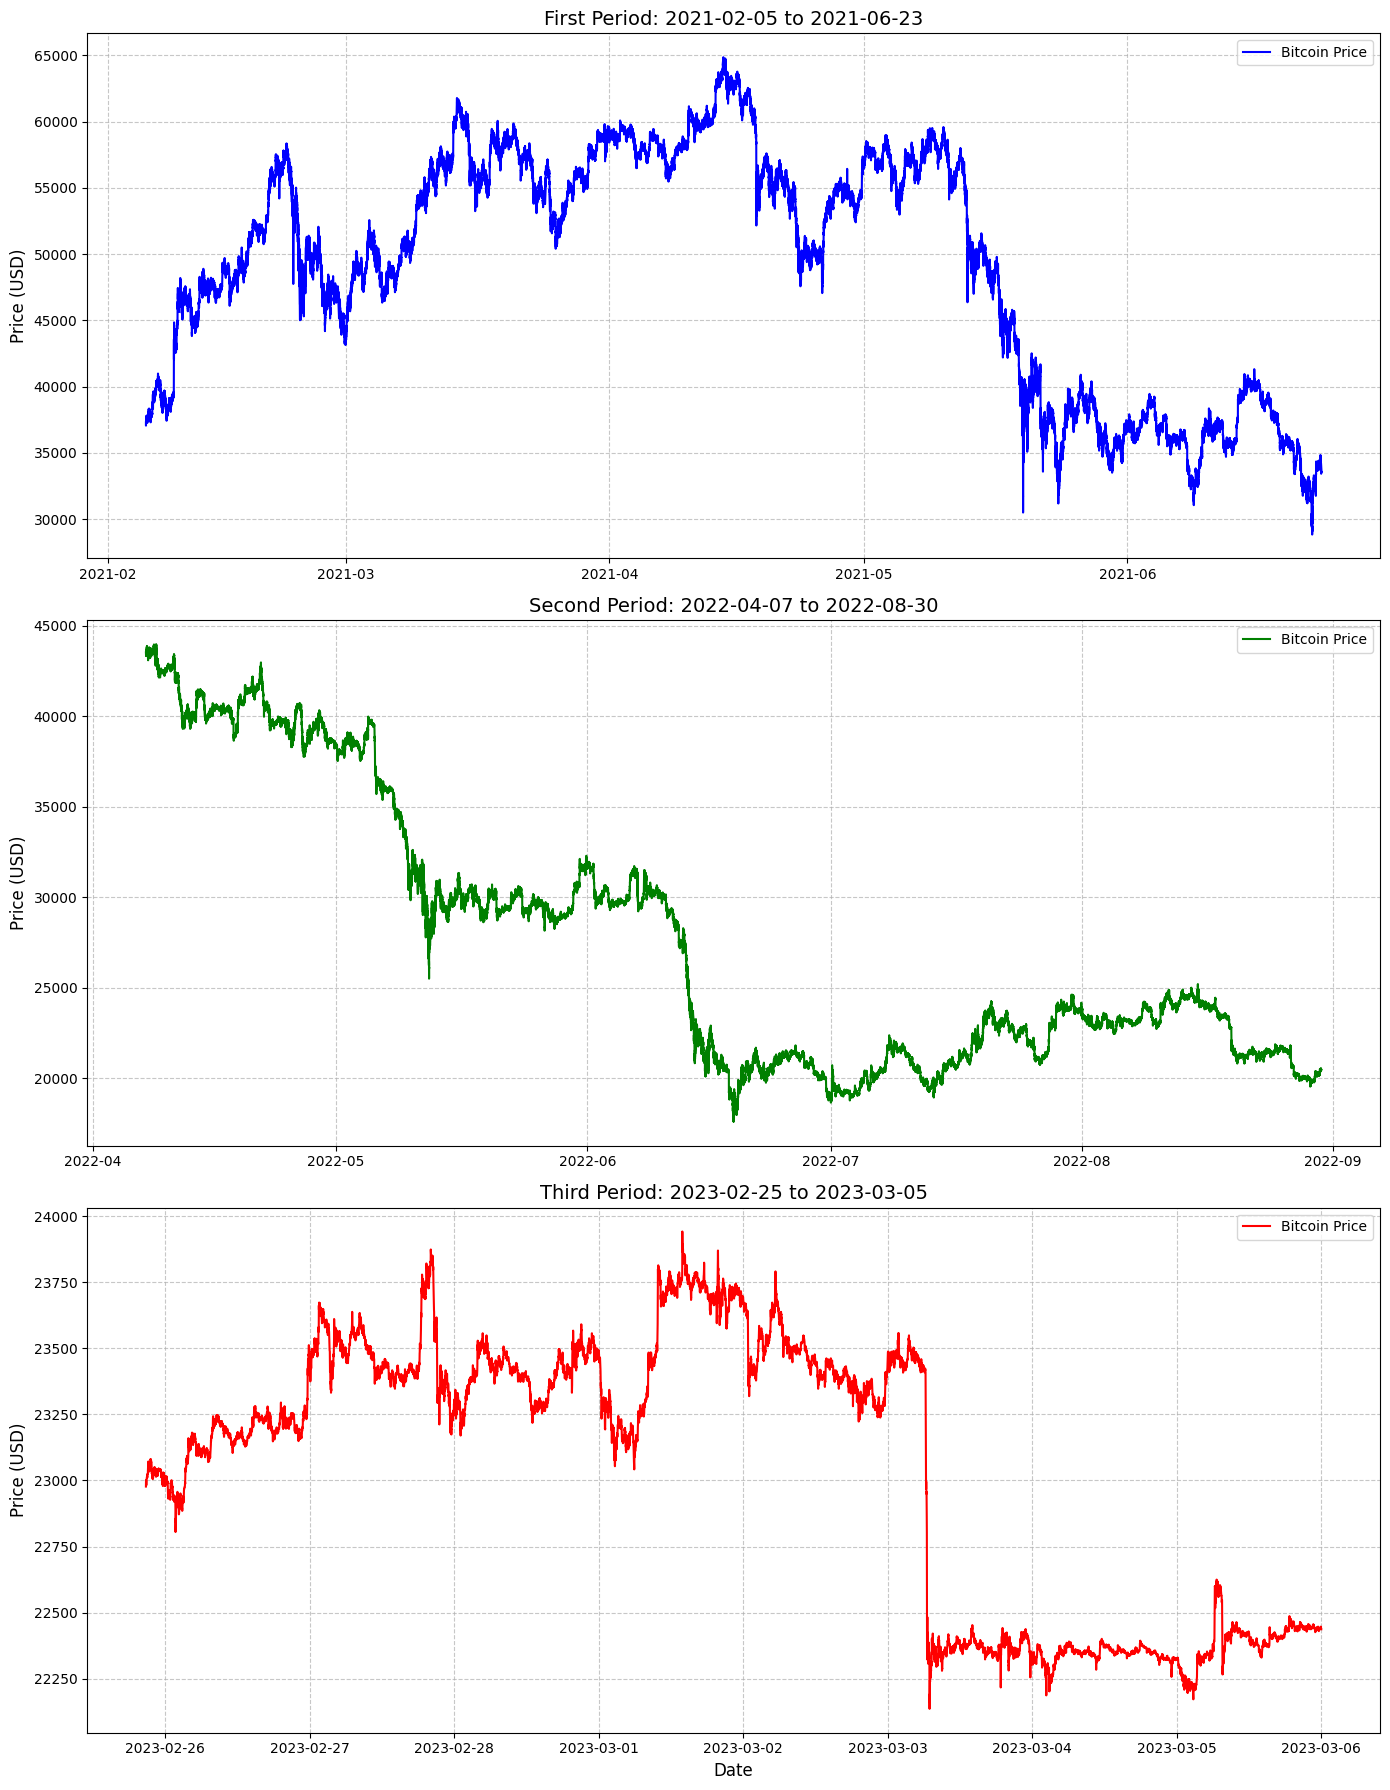

In [ ]:
import matplotlib.pyplot as plt

# Ensure the index is a datetime object
first_period_data.index = pd.to_datetime(first_period_data.index)
second_period_data.index = pd.to_datetime(second_period_data.index)
third_period_data.index = pd.to_datetime(third_period_data.index)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot for the First Period
axes[0].plot(first_period_data.index, first_period_data['Close'], label='Bitcoin Price', color='blue')
axes[0].set_title('First Period: 2021-02-05 to 2021-06-23', fontsize=14)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].grid(linestyle='--', alpha=0.7)
axes[0].legend()

# Plot for the Second Period
axes[1].plot(second_period_data.index, second_period_data['Close'], label='Bitcoin Price', color='green')
axes[1].set_title('Second Period: 2022-04-07 to 2022-08-30', fontsize=14)
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].grid(linestyle='--', alpha=0.7)
axes[1].legend()

# Plot for the Third Period
axes[2].plot(third_period_data.index, third_period_data['Close'], label='Bitcoin Price', color='red')
axes[2].set_title('Third Period: 2023-02-25 to 2023-03-05', fontsize=14)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Price (USD)', fontsize=12)
axes[2].grid(linestyle='--', alpha=0.7)
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

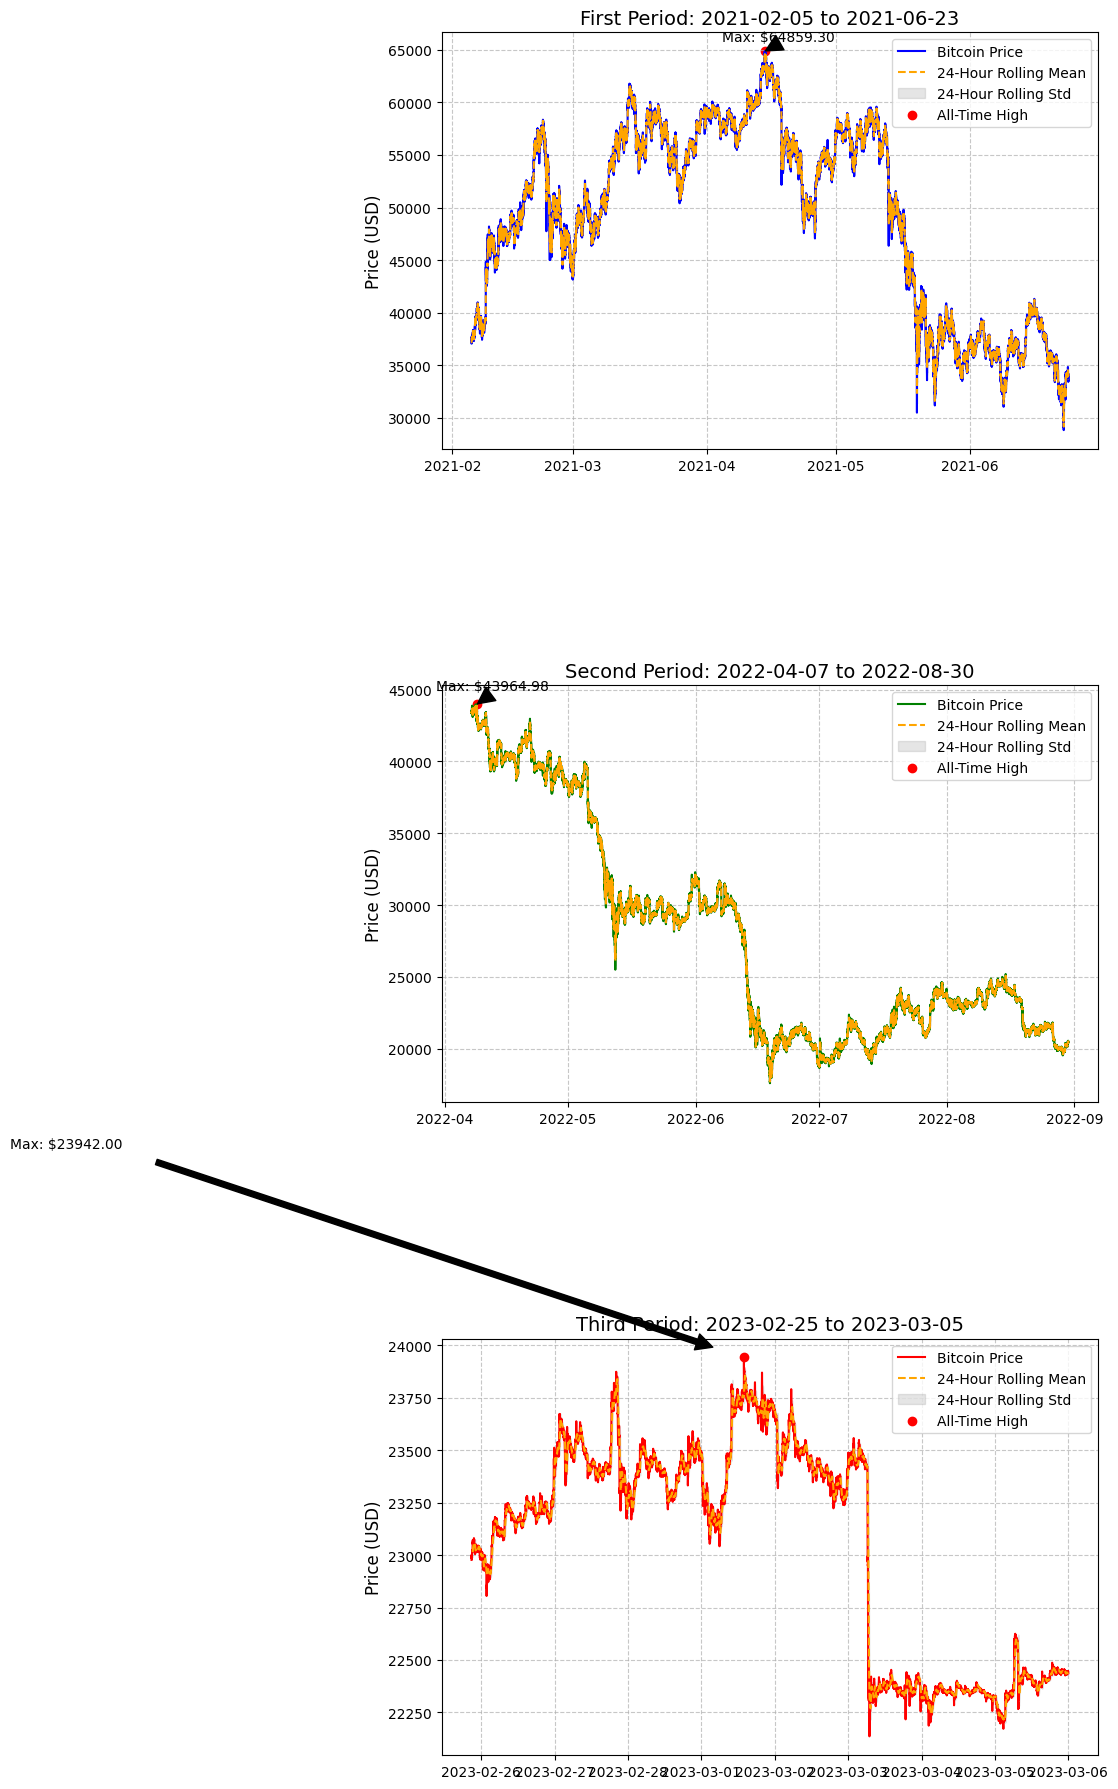

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is a datetime object
first_period_data.index = pd.to_datetime(first_period_data.index)
second_period_data.index = pd.to_datetime(second_period_data.index)
third_period_data.index = pd.to_datetime(third_period_data.index)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Function to add rolling statistics and annotations
def plot_period(ax, data, title, color):
    # Plot price
    ax.plot(data.index, data['Close'], label='Bitcoin Price', color=color)

    # Add rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=24).mean()  # 24-hour rolling mean
    rolling_std = data['Close'].rolling(window=24).std()    # 24-hour rolling std
    ax.plot(data.index, rolling_mean, label='24-Hour Rolling Mean', color='orange', linestyle='--')
    ax.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2, label='24-Hour Rolling Std')

    # Add annotations for key events (e.g., all-time high)
    max_price = data['Close'].max()
    max_price_date = data['Close'].idxmax()
    ax.scatter(max_price_date, max_price, color='red', label='All-Time High')
    ax.annotate(f'Max: ${max_price:.2f}', xy=(max_price_date, max_price), xytext=(max_price_date - pd.Timedelta(days=10), max_price + 1000), arrowprops=dict(facecolor='black', shrink=0.05))

    # Customize plot
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(linestyle='--', alpha=0.7)

# Plot for the First Period
plot_period(axes[0], first_period_data, 'First Period: 2021-02-05 to 2021-06-23', 'blue')

# Plot for the Second Period
plot_period(axes[1], second_period_data, 'Second Period: 2022-04-07 to 2022-08-30', 'green')

# Plot for the Third Period
plot_period(axes[2], third_period_data, 'Third Period: 2023-02-25 to 2023-03-05', 'red')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
print(bitcoin_price.head())

                        Timestamp  Open  High   Low  Close  Volume  year  \
datetime                                                                   
2012-01-01 10:01:00  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012   
2012-01-01 10:02:00  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012   
2012-01-01 10:03:00  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012   
2012-01-01 10:04:00  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012   
2012-01-01 10:05:00  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012   

                    month day day_of_week  hour  Daily_Return  \
datetime                                                        
2012-01-01 10:01:00     1   1      Sunday    10           NaN   
2012-01-01 10:02:00     1   1      Sunday    10           0.0   
2012-01-01 10:03:00     1   1      Sunday    10           0.0   
2012-01-01 10:04:00     1   1      Sunday    10           0.0   
2012-01-01 10:05:00     1   1      Sunday    10           0.0   

           

In [ ]:
print(bitcoin_price.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'year', 'month',
       'day', 'day_of_week', 'hour', 'Daily_Return', 'Rolling_Volatility'],
      dtype='object')


In [ ]:
# Keep only relevant columns for clustering
relevant_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Rolling_Volatility']
bitcoin_price_clustering = bitcoin_price[relevant_columns]

# Display the first few rows
print(bitcoin_price_clustering.head())

                     Open  High   Low  Close  Volume  Daily_Return  \
datetime                                                             
2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0           NaN   
2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0           0.0   

                     Rolling_Volatility  
datetime                                 
2012-01-01 10:01:00                 NaN  
2012-01-01 10:02:00                 NaN  
2012-01-01 10:03:00                 NaN  
2012-01-01 10:04:00                 NaN  
2012-01-01 10:05:00                 NaN  


In [ ]:
bitcoin_price_clustering.dropna(inplace=True)

<ipython-input-36-f20febe4094e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
bitcoin_price_clustering.shape

(6958764, 7)

In [ ]:

# Display the first few rows
print(bitcoin_price_clustering.head())

                     Open  High   Low  Close  Volume  Daily_Return  \
datetime                                                             
2012-01-01 10:08:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:09:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:10:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:11:00  4.58  4.58  4.58   4.58     0.0           0.0   
2012-01-01 10:12:00  4.58  4.58  4.58   4.58     0.0           0.0   

                     Rolling_Volatility  
datetime                                 
2012-01-01 10:08:00                 0.0  
2012-01-01 10:09:00                 0.0  
2012-01-01 10:10:00                 0.0  
2012-01-01 10:11:00                 0.0  
2012-01-01 10:12:00                 0.0  


In [ ]:
# Import the necessary class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bitcoin_price_clustering)

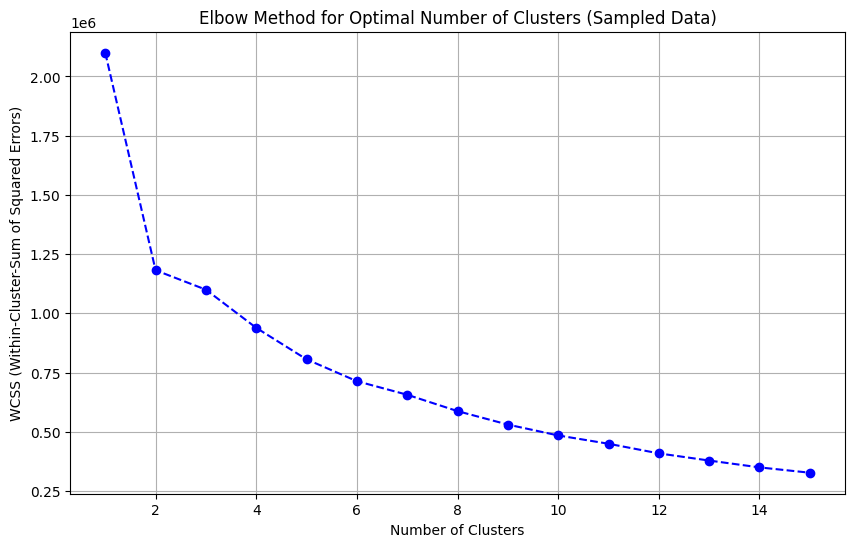

In [ ]:
# Import the necessary class
from sklearn.cluster import KMeans

# Take a random sample of 300,000 rows
sample_data = bitcoin_price_clustering.sample(n=300000, random_state=42)

# Scale the sampled data
scaler = StandardScaler()
scaled_sample_data = scaler.fit_transform(sample_data)

# Run the Elbow Method on the sampled data
wcss = []
max_clusters = 15

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42) # Now KMeans is defined
    kmeans.fit(scaled_sample_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters (Sampled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum of Squared Errors)')
plt.grid()
plt.show()

In [ ]:
# Choose the optimal number of clusters (e.g., 2)
optimal_clusters = 2

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
sample_data['Cluster'] = kmeans.fit_predict(scaled_sample_data)

# Display the first few rows with cluster labels
print(sample_data.head())

                         Open      High       Low     Close    Volume  \
datetime                                                                
2021-08-05 06:48:00  39283.86  39283.88  39260.88  39260.88  0.015110   
2022-07-25 02:07:00  22795.67  22830.48  22795.67  22830.48  0.009780   
2014-08-23 15:40:00    504.13    504.13    504.13    504.13  0.000000   
2016-07-01 11:39:00    667.57    667.57    667.57    667.57  0.011265   
2017-03-30 21:57:00   1030.69   1030.69   1029.42   1029.42  0.030922   

                     Daily_Return  Rolling_Volatility  Cluster  
datetime                                                        
2021-08-05 06:48:00     -0.000142            0.001010        0  
2022-07-25 02:07:00      0.001435            0.000948        1  
2014-08-23 15:40:00      0.000000            0.000877        1  
2016-07-01 11:39:00      0.000855            0.001670        1  
2017-03-30 21:57:00     -0.001164            0.001220        1  


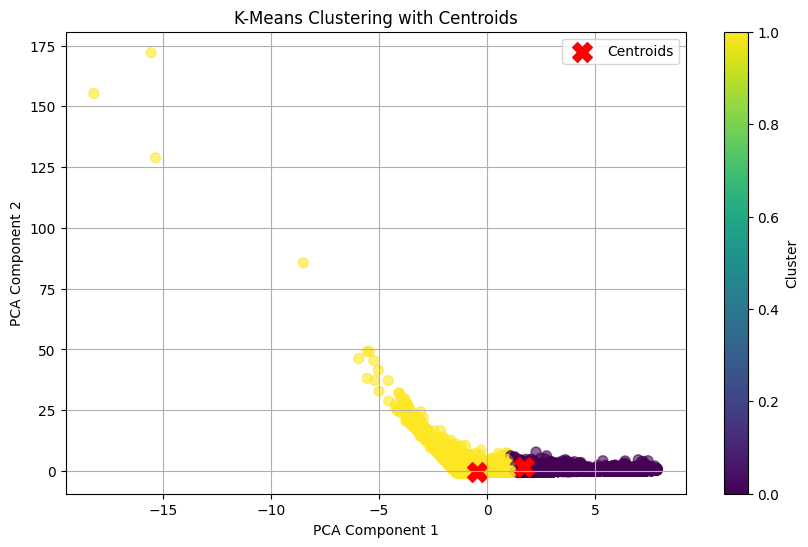

In [ ]:
from sklearn.decomposition import PCA

# Assuming scaled_sample_data is your scaled data
pca = PCA(n_components=2)  # Reduce to 2 components for 2D plotting
pca_result = pca.fit_transform(scaled_sample_data)

# Add the PCA components as columns to your DataFrame
sample_data['PCA1'] = pca_result[:, 0]
sample_data['PCA2'] = pca_result[:, 1]

# Now you can create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['PCA1'], sample_data['PCA2'], c=sample_data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()s

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 3D using PCA
pca = PCA(n_components=3)  # Reduce to 3 components for 3D plotting
pca_result = pca.fit_transform(scaled_sample_data)

# Add the PCA components as columns to your DataFrame
sample_data['PCA1'] = pca_result[:, 0]
sample_data['PCA2'] = pca_result[:, 1]
sample_data['PCA3'] = pca_result[:, 2]

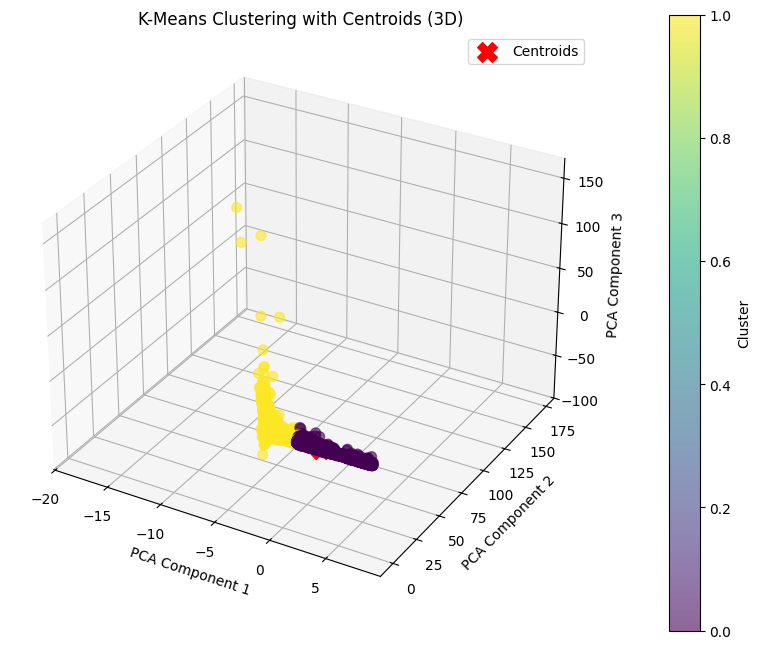

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Get the centroids in the PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points
scatter = ax.scatter(sample_data['PCA1'], sample_data['PCA2'], sample_data['PCA3'], c=sample_data['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Plot the centroids
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], c='red', marker='X', s=200, label='Centroids')

# Add labels and title
ax.set_title('K-Means Clustering with Centroids (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Group by cluster and calculate mean values
cluster_summary = sample_data.groupby('Cluster').mean()
print(cluster_summary)

                 Open          High           Low         Close    Volume  \
Cluster                                                                     
0        56467.069079  56489.209777  56444.696530  56467.471859  2.027257   
1         6381.561050   6384.388243   6378.619047   6381.556901  6.149237   

         Daily_Return  Rolling_Volatility      PCA1      PCA2      PCA3  
Cluster                                                                  
0            0.000004            0.000760  3.429024  0.126730  0.011697  
1            0.000009            0.001082 -0.891024 -0.032931 -0.003039  


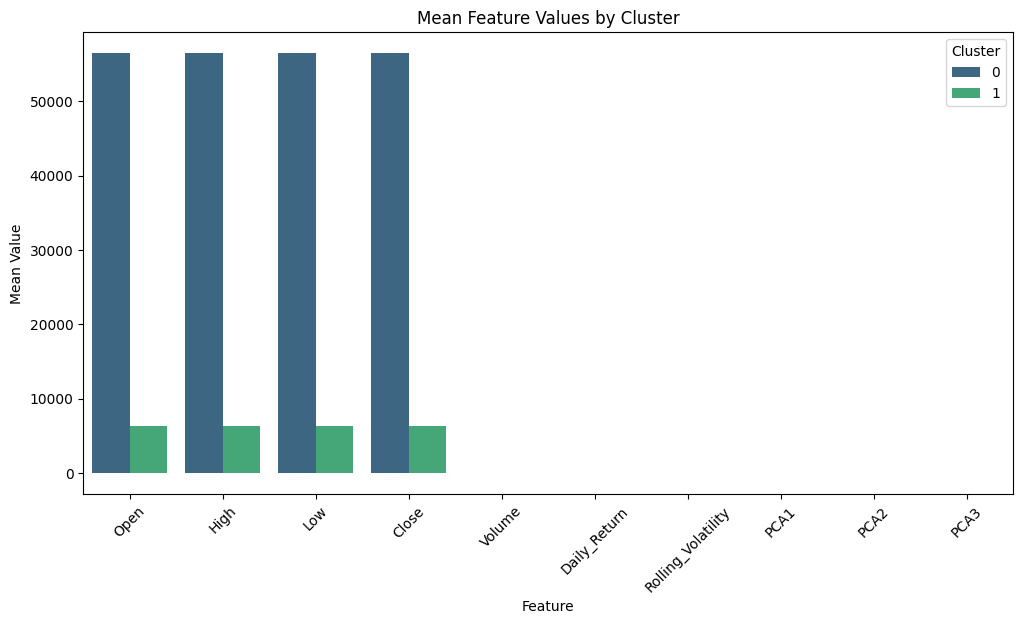

In [ ]:
import seaborn as sns

# Melt the cluster summary for easier plotting
cluster_summary_melted = cluster_summary.reset_index().melt(id_vars='Cluster', var_name='Feature', value_name='Mean Value')

# Plot feature means by cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_summary_melted, x='Feature', y='Mean Value', hue='Cluster', palette='viridis')
plt.title('Mean Feature Values by Cluster')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Add cluster labels to the original data
sample_data['Cluster'] = kmeans.labels_

# Group by cluster and get the time range
for cluster in sample_data['Cluster'].unique():
    cluster_dates = sample_data[sample_data['Cluster'] == cluster].index
    print(f"Cluster {cluster}: {cluster_dates.min()} to {cluster_dates.max()}")

Cluster 0: 2021-01-02 21:31:00 to 2025-03-14 23:34:00
Cluster 1: 2012-01-01 10:10:00 to 2023-10-24 03:11:00


In [ ]:
# Check the size of each cluster
cluster_sizes = sample_data['Cluster'].value_counts().sort_index()
print("Size of each cluster:")
print(cluster_sizes)

Size of each cluster:
Cluster
0     61876
1    238124
Name: count, dtype: int64
